In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## DATA CLEANING

In [2]:
df1= pd.read_csv('bengaluru_house_prices.csv')
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df1.shape                #NUMBER OF TOTAL ROWS AND COLUMN

(13320, 9)

In [4]:
#NOW I'm GOING TO GROUP MY DATA INTO BASED ON AREA TYPE

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#AT FIRST WE HAVE TO HANDLE ALL THE NULL VALUES FROM THE DATASET

In [7]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#NOW WE HAVE TWO CHOICES EITHER WE CAN DROP ALL THE NULL VALUES OR WE CAN FILL THEM WITH THE MEDIAN VALUES.

In [9]:
df2=df1.dropna()
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [10]:
df2.shape

(7496, 9)

In [11]:
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [12]:
#here the SIZE column have different values

df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [13]:
#for this we create a new column 

df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00,3
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2


In [15]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [16]:
#now let's check the 'total sqft' column

df2.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,Rarthne,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,Toainnt,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,Brens7,1160 - 1195,2.0,0.0,59.935,2
850,Super built-up Area,22-Dec,Bannerghatta Road,2 BHK,PrarePa,1115 - 1130,2.0,0.0,58.935,2


In [19]:
#now let's write a function to find the average of the range.

In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [22]:
#lets apply it on the whole dataset

df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,3
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2


In [23]:
#check it

df3.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
society                      LedorSa
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
bhk                                4
Name: 30, dtype: object

In [24]:
df3.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [25]:
df3.to_csv('cleaned_dataframe.csv', index= False)

## FEATURE ENGINEERING

In [26]:
#creating new column as price per sqft.

df4 = df3.copy()
df4['price_per_sqft']= df4['price']*100000/df4['total_sqft']
df4.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [27]:
#now let's see how many location do we have
len(df4.location.unique())

634

In [28]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stats.head(120)

location
Whitefield          398
Sarjapur  Road      310
Electronic City     238
Kanakpura Road      216
Thanisandra         215
                   ... 
Nagarbhavi           13
Kereguddadahalli     13
Padmanabhanagar      13
Gubbalala            13
Begur                13
Name: location, Length: 120, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

483

In [30]:
location_stats_less_than_10 =location_stats[location_stats<=10] 
location_stats_less_than_10

location
Amruthahalli                      10
Arekere                           10
Vidyaranyapura                    10
Jalahalli East                    10
Mallasandra                       10
                                  ..
Kattigenahalli                     1
Kashi Nagar                        1
Kamakshipalya                      1
Kalhalli                           1
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 483, dtype: int64

In [31]:
len(df4.location.unique())

626

In [32]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

144

In [33]:
df4.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00,2,3800.000000
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250.0,3.0,2.0,148.00,3,6577.777778
15,Super built-up Area,Ready To Move,Mysore Road,2 BHK,PrntaEn,1175.0,2.0,2.0,73.50,2,6255.319149
16,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1180.0,3.0,2.0,48.00,3,4067.796610
17,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1540.0,3.0,3.0,60.00,3,3896.103896


## OUTLINER REMOVAL

In [34]:
#total sqft is not matching with size. for this

In [35]:
df4[df4.total_sqft/df4.bhk<300].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
349,Plot Area,18-Dec,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,Ready To Move,other,4 BHK,LiaveEn,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,Ready To Move,other,5 Bedroom,Bemesrm,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,16.0,2,2909.090909
2040,Super built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,15.0,2,2727.272727


In [36]:
#here for 11sqft we have 3 bhk which is totally wrong. so we have to fix these values

In [37]:
df4.shape

(7496, 11)

In [38]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(7454, 11)

In [39]:
#now we gonna check price per sqft(very high or very low).

df5.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [40]:
#we find mean and standard deviation per location.

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


In [41]:
df6 = remove_pps_outliers(df5)
df6.shape

(5862, 11)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

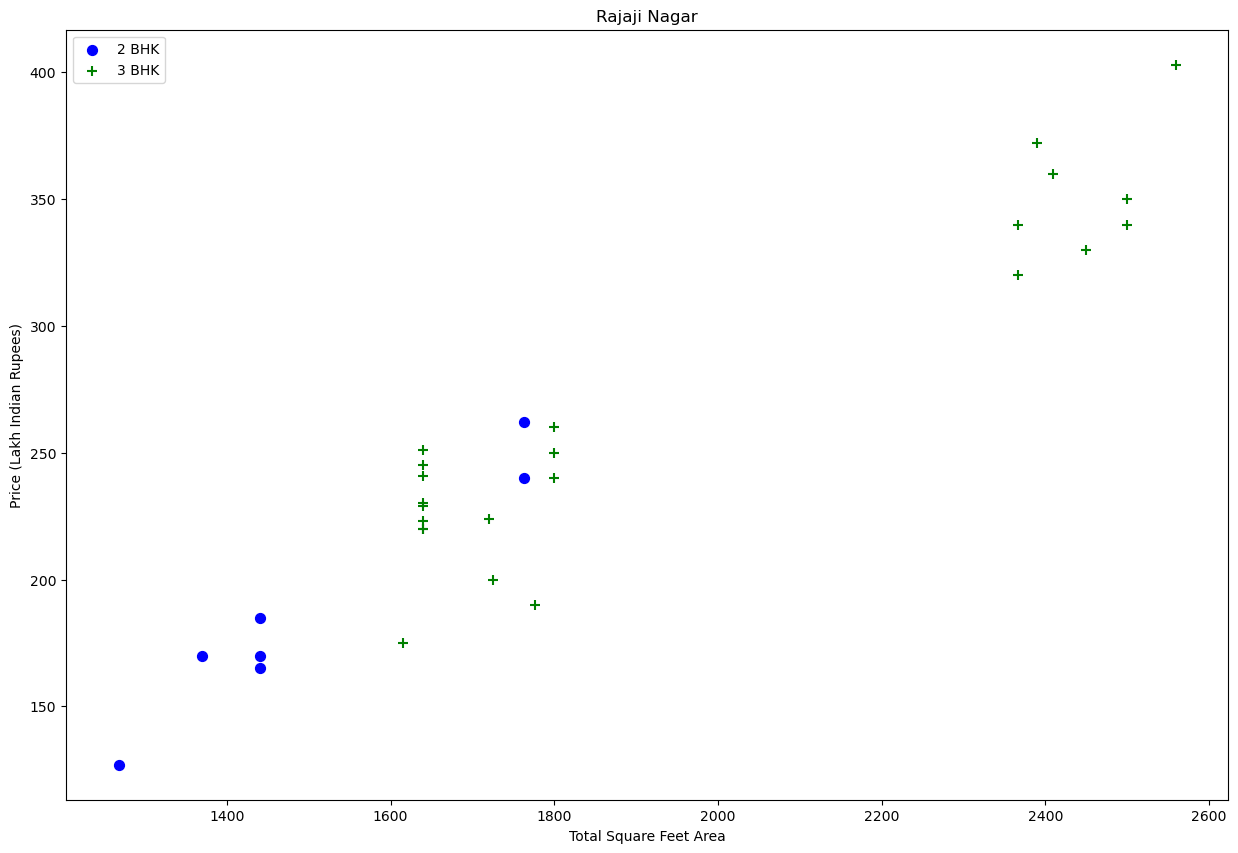

In [43]:
plot_scatter_chart(df6,"Rajaji Nagar")

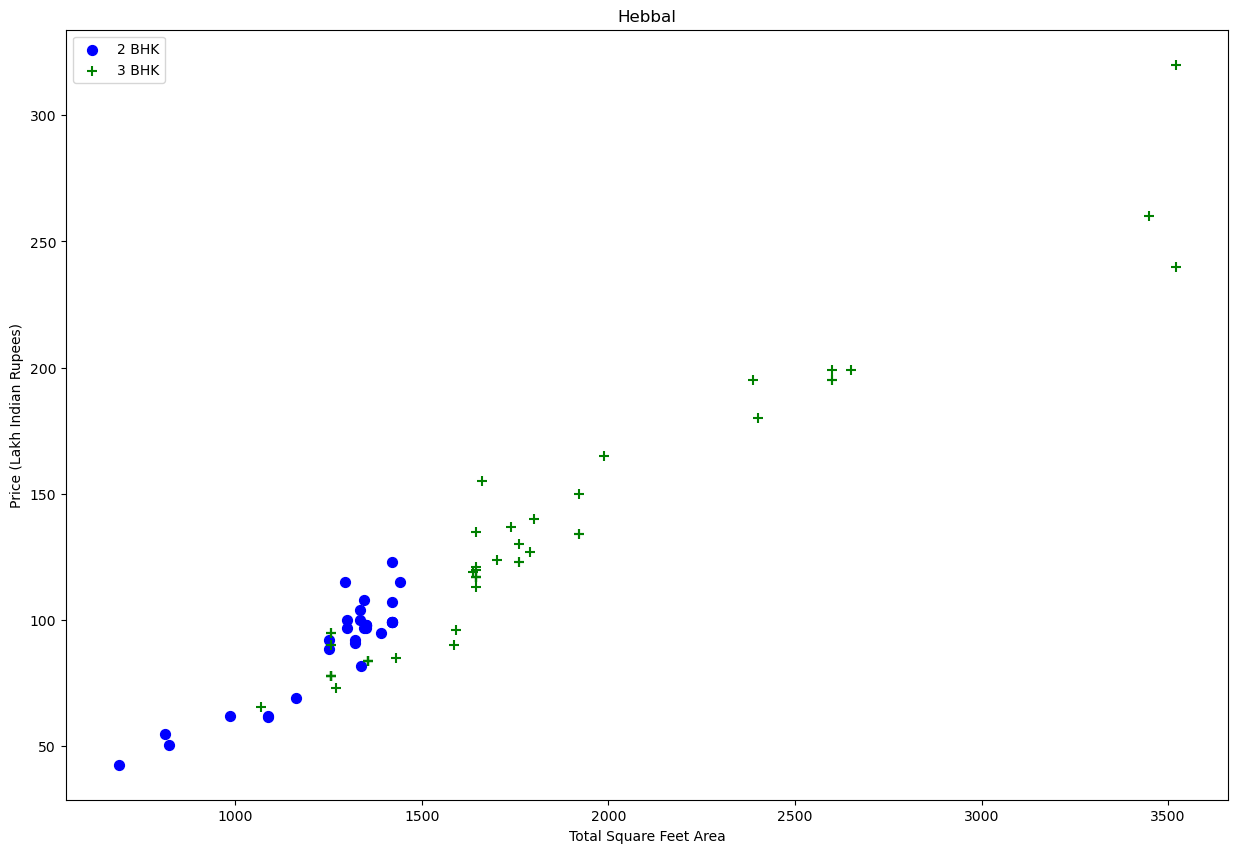

In [44]:
plot_scatter_chart(df6,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).
What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
      },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [46]:
df7 = remove_bhk_outliers(df6)
df7.shape

(4059, 11)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

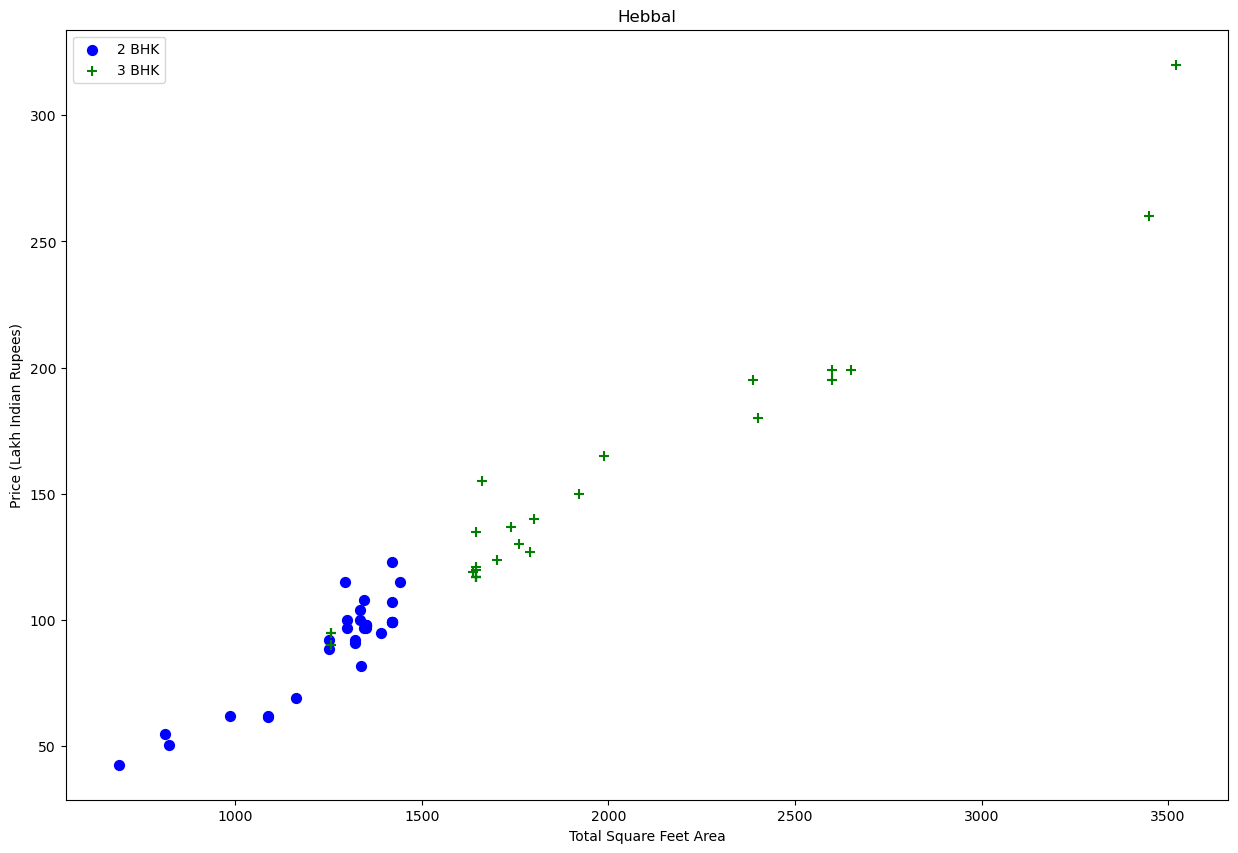

In [47]:
plot_scatter_chart(df7,"Hebbal")

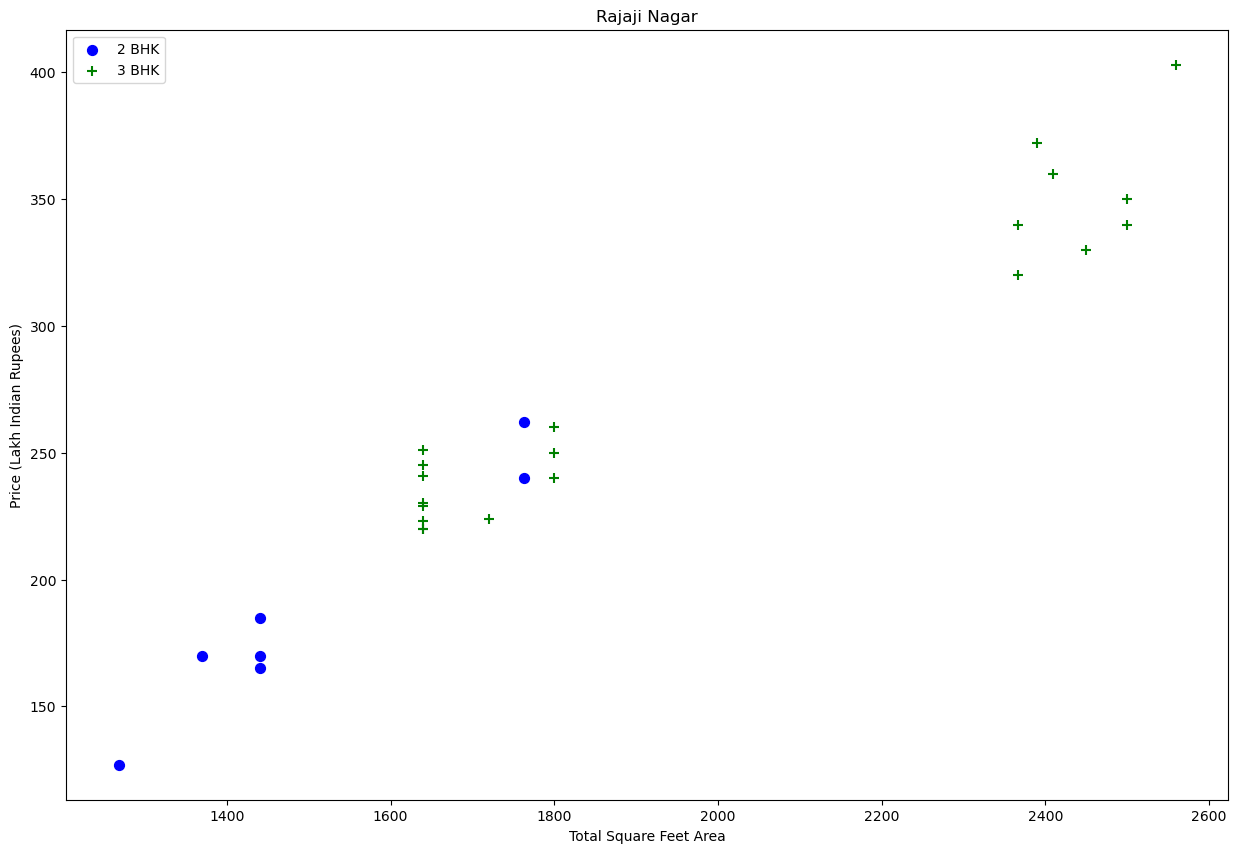

In [48]:
plot_scatter_chart(df7,"Rajaji Nagar")

HISTOGRAM

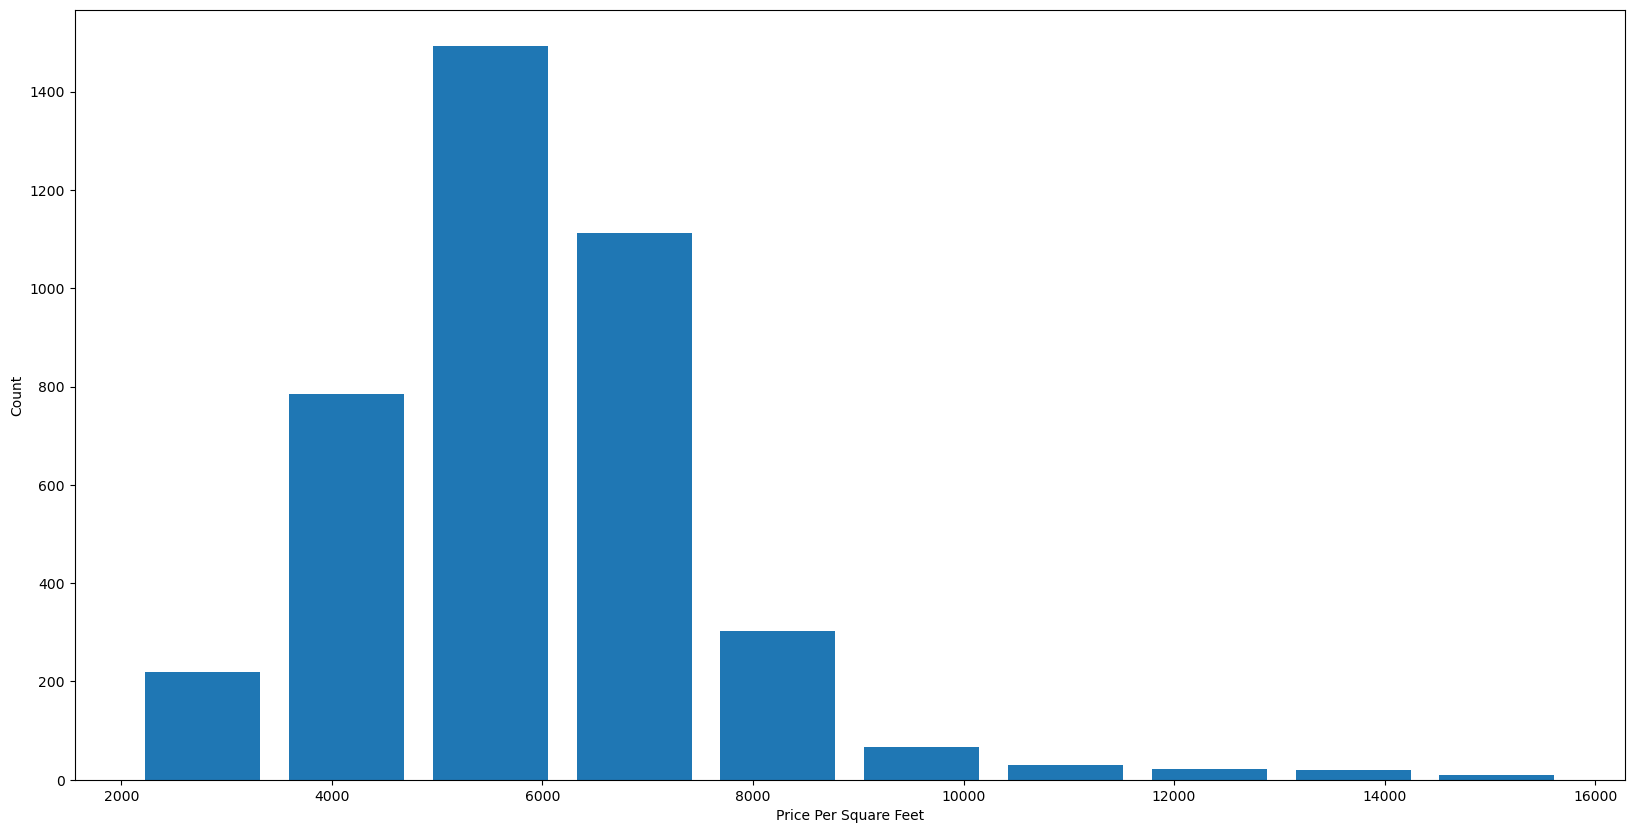

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
import warnings
warnings.filterwarnings('ignore')

#### Outlier Removal Using Bathrooms Feature

In [50]:
df7.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

Text(0, 0.5, 'Count')

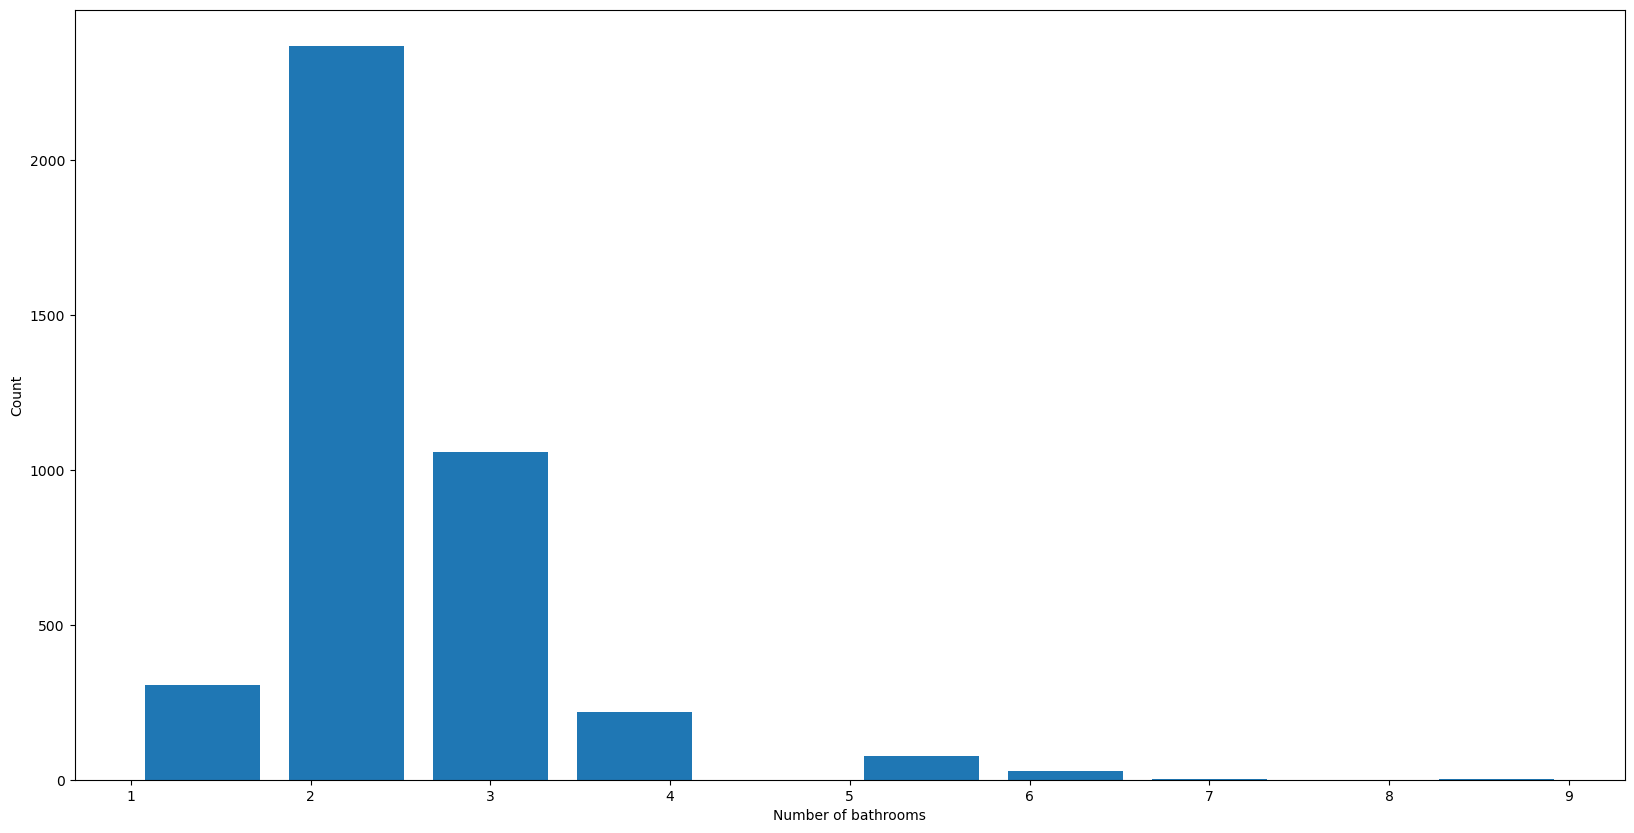

In [51]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It is unusual to have 2 more bathrooms than number of bedrooms in a home.

In [52]:
df7[df7.bath>df7.bhk+2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
3791,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1806.0,6.0,2.0,116.0,3,6423.034330
4866,Super built-up Area,Ready To Move,other,6 BHK,Prowshi,11338.0,9.0,1.0,1000.0,6,8819.897689


If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [53]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(4017, 11)

In [54]:
df8.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711
5,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2180.0,3.0,2.0,210.0,3,9633.027523
6,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,2077.0,3.0,3.0,175.0,3,8425.613866
7,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1205.0,2.0,1.0,85.0,2,7053.941909
8,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2615.0,5.0,3.0,222.0,4,8489.483748
9,Built-up Area,Ready To Move,5th Phase JP Nagar,2 BHK,Prenty,1150.0,3.0,3.0,52.5,2,4565.217391


In [55]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,NCaveun,1394.0,2.0,1.0,100.0,2
3,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1077.0,2.0,2.0,93.0,2
4,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1590.0,3.0,3.0,131.0,3


## Use One Hot Encoding For Location

In [56]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,NCaveun,1394.0,2.0,1.0,100.0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1077.0,2.0,2.0,93.0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1590.0,3.0,3.0,131.0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = df10.drop('location',axis='columns')
df11.head()

,area_type,availability,society,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,Prhtsok,2825.0,4.0,3.0,250.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,Prhtsok,1875.0,3.0,1.0,167.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,NCaveun,1394.0,2.0,1.0,100.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,Inntsth,1077.0,2.0,2.0,93.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,Inntsth,1590.0,3.0,3.0,131.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df12 = df11.drop(['area_type','society','availability'],axis='columns')
df12.head(2)

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build a Model Now..

In [60]:
df12.shape

(4017, 148)

In [61]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,1.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X.shape

(4017, 147)

In [63]:
y = df12.price
y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [64]:
len(y)

4017

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9302127875004401

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92503848, 0.91538325, 0.9202856 , 0.92377802, 0.90412089])

### Find best model using GridSearchCV.

In [68]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [69]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.917721,{'normalize': False}
1,lasso,0.795882,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.861747,"{'criterion': 'mse', 'splitter': 'random'}"


### Test the model for few properties

In [70]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Phase JP Nagar',
       '5th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       '9th Phase JP Nagar', 'AECS Layout',
       ...
       'Thubarahalli', 'Tumkur Road', 'Uttarahalli', 'Varthur', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur'],
      dtype='object', length=147)

In [71]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [72]:
predict_price('1st Phase JP Nagar',1000,2,2)

102.26125201104776

In [73]:
predict_price('5th Phase JP Nagar',1200,2,3)

74.2154973950629

In [74]:
predict_price('8th Phase JP Nagar',2400,3,3)

161.14429873845648

In [75]:
predict_price('Indira Nagar',1000, 2, 2)

127.32285535031363

In [76]:
predict_price('5th Phase JP Nagar',1200,3,3)

79.68792350948678

### Export the tested model to a pickle file

In [77]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))